# Portugese Bank campaign

## Data Importing/Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv(r'C:\Users\UBAID USMANI\Desktop\Projects\Internship work\bank-additional\bank-additional-full.csv',sep=';')

In [3]:
file.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
file.get_dtype_counts()

float64     5
int64       5
object     11
dtype: int64

### Numeric data analysis

In [6]:
file_numeric = file.select_dtypes(exclude=['object'])

In [7]:
file_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [8]:
file_numeric.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


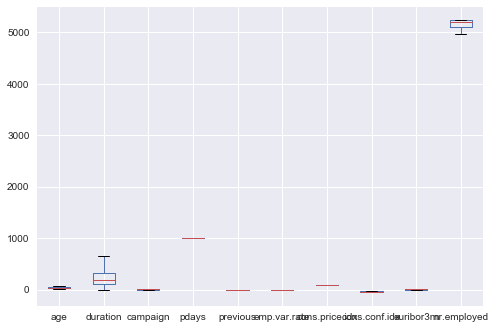

In [9]:
file_numeric.boxplot()

### Checking for randomness in data

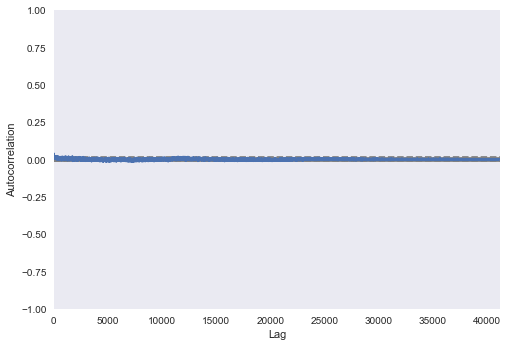

In [37]:
from pandas.plotting import scatter_matrix,parallel_coordinates,autocorrelation_plot,bootstrap_plot
autocorrelation_plot(file_numeric['duration'])

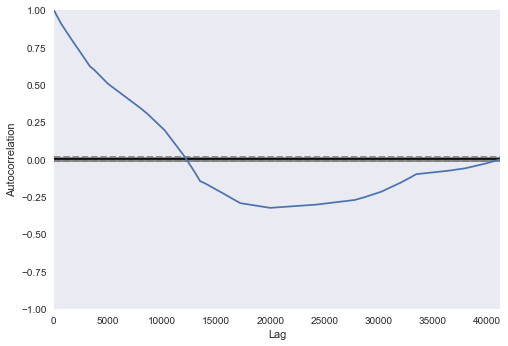

In [28]:
autocorrelation_plot(file_numeric['nr.employed'])

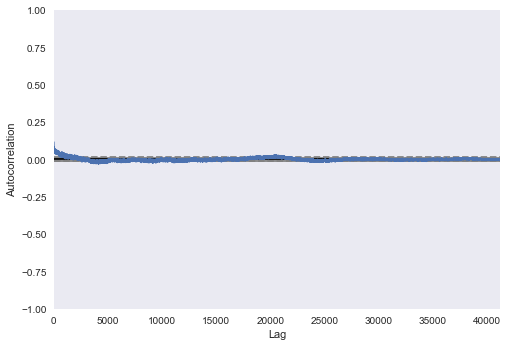

In [29]:
autocorrelation_plot(file_numeric['age'])

From the above autocorrelation plot we found that the age and duration is having max randomness and the nr.empoyed is having non random elements.

#### Relation between numeric data using correlation plot

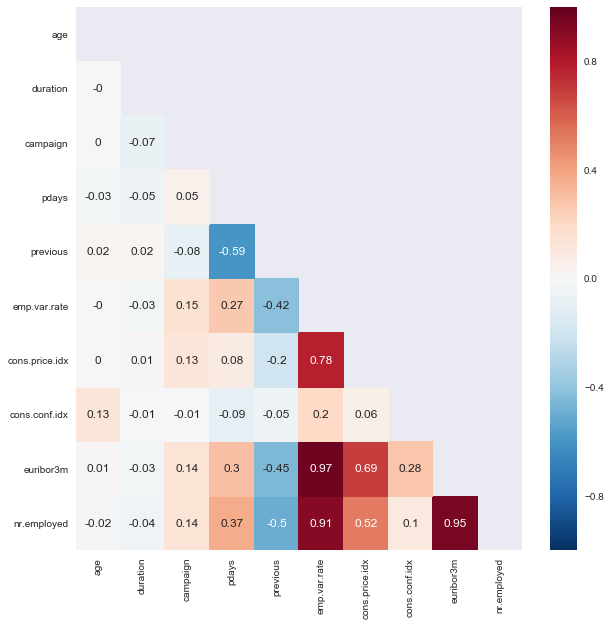

In [35]:
fig = plt.figure(figsize=(10,10))
corr_dataframe = file_numeric.corr()
mask = np.zeros_like(corr_dataframe)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(corr_dataframe,2),mask=mask,annot=True,cbar=True)

From the above correlation heatmap we found out that emp.var.rate is highly correlated with nr.employed,euribor3m and cons.price.idx. Also euribir3m is highly correlated to nr.employed. So removing all correlated data features will not affect the model much.

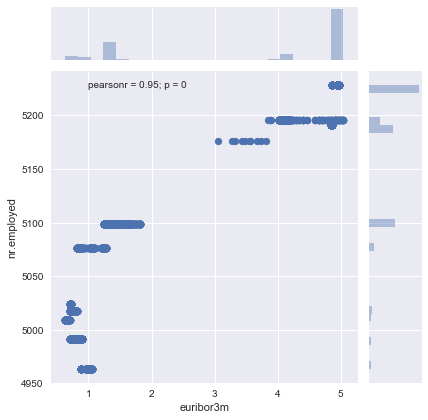

In [45]:
sns.jointplot(x='euribor3m', y='nr.employed', data=file_numeric)

The above sactter plot also prove that euribor3m and nr.employed are highly correlated

### Descriptive statistics analysis of data

We will check statistics of age duration and nr.empoyed because variation of distribution of these three feature are significant

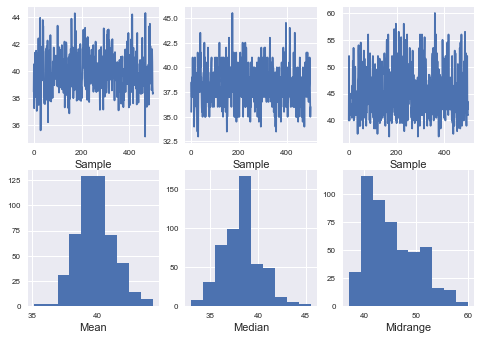

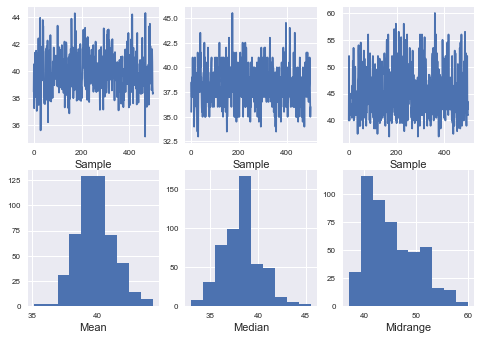

In [38]:
bootstrap_plot(file_numeric['age'])

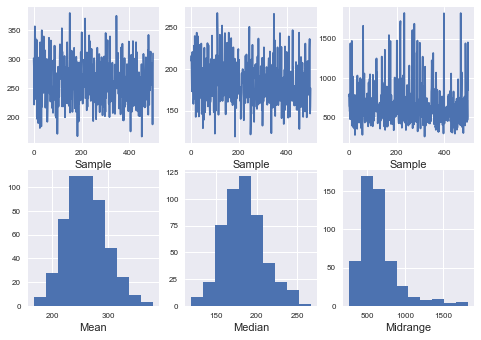

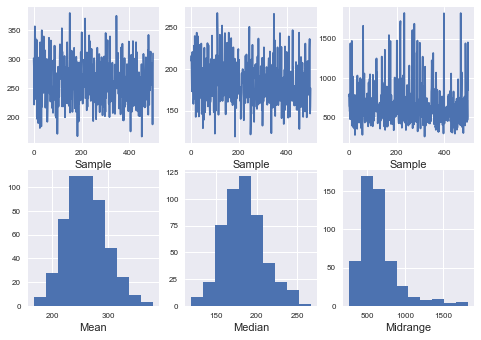

In [39]:
bootstrap_plot(file_numeric['duration'])

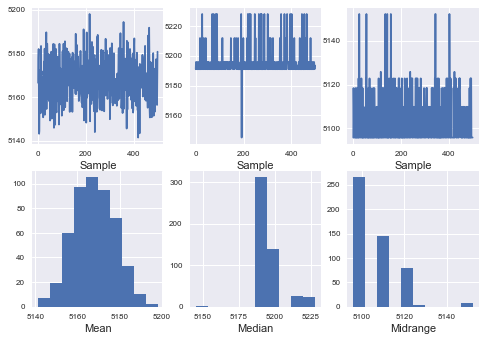

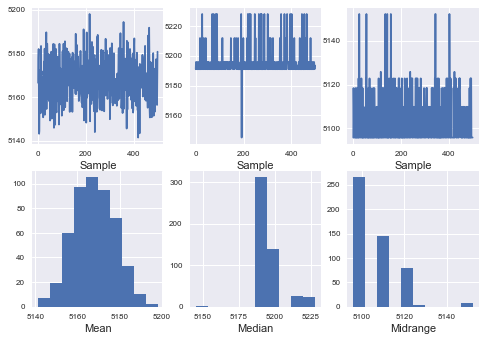

In [40]:
bootstrap_plot(file_numeric['nr.employed'])

### Distribution analysis of data

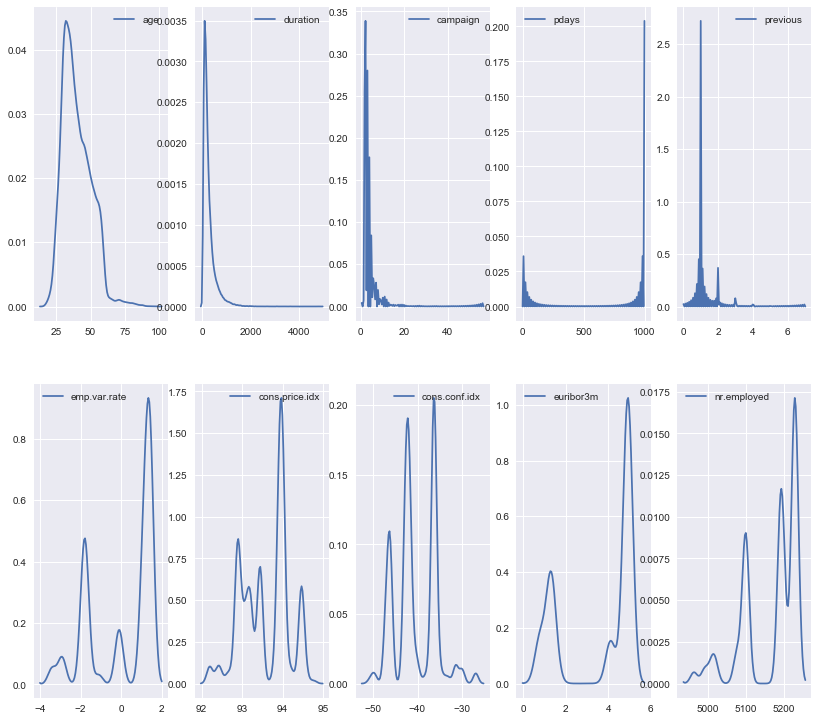

In [50]:
fig = plt.subplots(2,5,figsize=(18,12))
ax = plt.gca()
for i in range(1,11):
    plt.subplot(2,5,i)
    sns.kdeplot(file_numeric.iloc[:,i-1])
    plt.subplots_adjust(bottom=0.1,right=0.8,top=0.9,left=0.2)
plt.show()

### Categoraical data analysis 

In [60]:
file_categorical = file.select_dtypes(include=['object'])

In [61]:
file_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [62]:
file_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
y              41188 non-null object
dtypes: object(11)
memory usage: 3.5+ MB


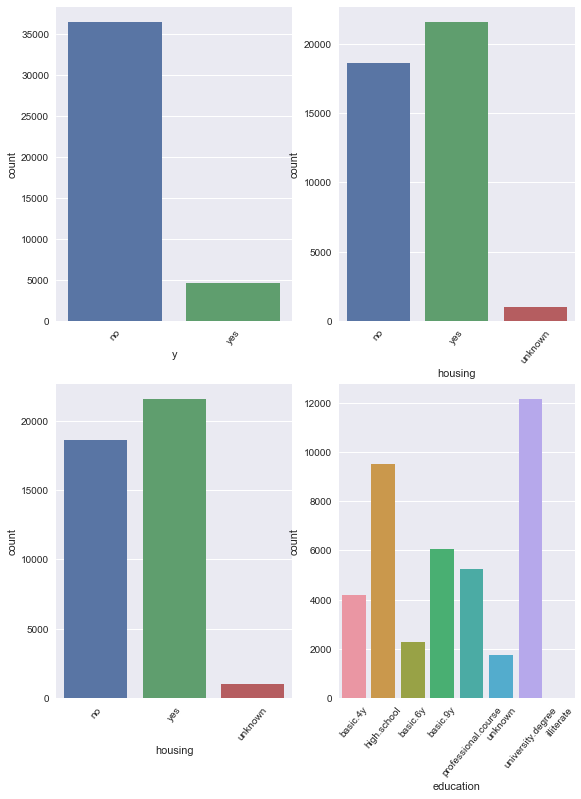

In [23]:
fig = plt.subplots(3,3,squeeze=False,figsize=(12,12))
ax = plt.gca()
for i in range(4):
    plt.subplot(2,2,i+1)
    rand_index = np.random.randint(11)
    sns.countplot(x=list(file_categorical.columns)[rand_index],data=file_categorical)
    plt.xticks(rotation=50)
    plt.subplots_adjust(bottom=0.1,right=0.8,top=0.9,left=0.2)

## Data preprocessing

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
label_encode_transform = LabelEncoder()

file_categorical1 = file_categorical.apply(lambda col:label_encode_transform.fit_transform(col))

file_categorical1.head(7)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0
5,7,1,2,1,0,0,1,6,1,1,0
6,0,1,5,0,0,0,1,6,1,1,0


In [64]:
print(type(file_categorical1))

file_categorical1.max(axis=0)

<class 'pandas.core.frame.DataFrame'>


job            11
marital         3
education       7
default         2
housing         2
loan            2
contact         1
month           9
day_of_week     4
poutcome        2
y               1
dtype: int64

### Since the categorical values are quite variable and the label encoders are varying like job has label encoded till 11 and contact label is 1. Thus the label encoded values need to be converted to One-hot coded values.

### DictVectorizer combine both the label encoding and one hot vector formation together.

In [65]:
file_categorical.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
y              object
dtype: object

In [66]:
from sklearn.feature_extraction import DictVectorizer
file_sklearnfile_categorical = file_categorical.T.to_dict().values()


In [67]:
didct_vector = DictVectorizer()
encoded_dataframe = didct_vector.fit_transform(file_sklearnfile_categorical).toarray()

In [68]:
encoded_dataframe

array([[ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  1., ...,  0.,  1.,  0.]])

In [69]:
didct_vector.get_feature_names()

['contact=cellular',
 'contact=telephone',
 'day_of_week=fri',
 'day_of_week=mon',
 'day_of_week=thu',
 'day_of_week=tue',
 'day_of_week=wed',
 'default=no',
 'default=unknown',
 'default=yes',
 'education=basic.4y',
 'education=basic.6y',
 'education=basic.9y',
 'education=high.school',
 'education=illiterate',
 'education=professional.course',
 'education=university.degree',
 'education=unknown',
 'housing=no',
 'housing=unknown',
 'housing=yes',
 'job=admin.',
 'job=blue-collar',
 'job=entrepreneur',
 'job=housemaid',
 'job=management',
 'job=retired',
 'job=self-employed',
 'job=services',
 'job=student',
 'job=technician',
 'job=unemployed',
 'job=unknown',
 'loan=no',
 'loan=unknown',
 'loan=yes',
 'marital=divorced',
 'marital=married',
 'marital=single',
 'marital=unknown',
 'month=apr',
 'month=aug',
 'month=dec',
 'month=jul',
 'month=jun',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'poutcome=failure',
 'poutcome=nonexistent',
 'poutcome=success',


In [70]:
categorical_dataframe = pd.DataFrame(encoded_dataframe,columns = didct_vector.get_feature_names())

In [71]:
categorical_dataframe.head()

,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,default=no,default=unknown,default=yes,...,month=mar,month=may,month=nov,month=oct,month=sep,poutcome=failure,poutcome=nonexistent,poutcome=success,y=no,y=yes
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# 

In [79]:
from sklearn.ensemble import RandomForestClassifier
main_table = file_numeric.join(categorical_dataframe)

In [99]:
x_train = main_table.iloc[:,:-2]
y_train = main_table.iloc[:,-1]
feature_selector = RandomForestClassifier(n_estimators=250,
                              random_state=0)
columns = main_table.columns[:-2]
feature_selector.fit(x_train,y_train)
important_features = forest.feature_importances_
indices = np.argsort(important_features)

feature_important_dataframe = pd.DataFrame(columns=['feature_name','importance'])
feature_important_dataframe['feature_name'] = [columns[indices[i]] for i in range(x.shape[1]) ]
feature_important_dataframe['importance'] = [important_features[indices[i]] for i in range(x.shape[1])]

In [105]:
feature_important_dataframe

,feature_name,importance
0,default=yes,4.714297e-08
1,education=illiterate,2.179177e-04
2,marital=unknown,4.948644e-04
3,month=dec,8.796918e-04
4,job=unknown,1.594538e-03
5,loan=unknown,1.865961e-03
6,housing=unknown,1.867738e-03
7,month=sep,2.133652e-03
8,month=nov,2.160203e-03
9,month=jul,2.488871e-03


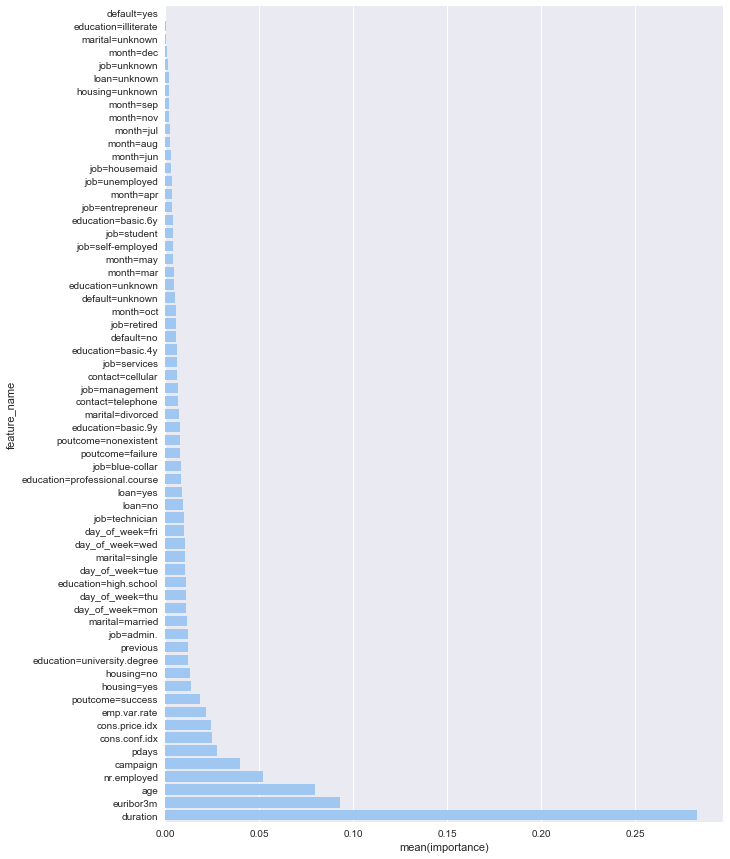

In [108]:
ax,fig = plt.subplots(figsize=(10,15))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y="feature_name", data=feature_important_dataframe,
            label="Importance", color="b")
plt.show()